### Рассмотрим на тестовом примере использование преобразования Фурье

In [35]:
import numpy
import matplotlib
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator, NullFormatter
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [36]:
N=64 # число точек
t=arange(N)# "время" с шагом единица
# Функция, состоящая из двух синусоид с периодом 24 и 7
y=sin(2.*pi/24.*t)+5.*sin(2.*pi/7.*t)
w1=1./24. # частоты, соответствующие заданным периодам
w2=1./7.
print (w1,w2)

0.041666666666666664 0.14285714285714285


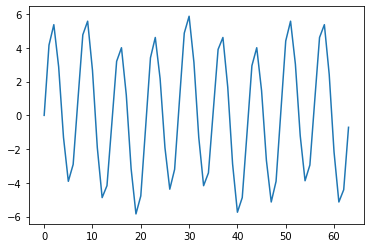

In [37]:
plot(t,y)

### Результат применения функции fft - массив к-тов Фурье преобразования размерностью N+1

In [38]:
Y=fft.fft(y)

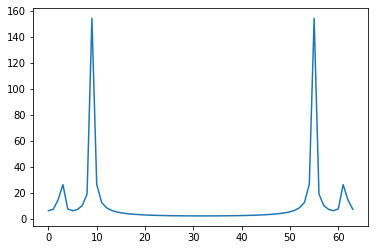

In [39]:
plot(abs(Y))

Для действительных значений y, fft()  вычисляет N/2 значение к-тов от минимальной до максимально возможной fc(fc = Котельникова-Найквиста/2). Заметим, что значение к-тов симметричны относительно N/2

In [40]:
# Функция, которая расчитывает значения частот от минимальной до максимально возможной
# задаем количество частот и шаг по частоте=частоте Котельникова
w=fftfreq(N, d=1.0)
print (w) # — возвращает частоты для выходных массивов функций fft*.
# "нулевая" частота соответствует среднему значению y
# отрицательные частоты имеют смысл для комплексного сигнала

[ 0.        0.015625  0.03125   0.046875  0.0625    0.078125  0.09375
  0.109375  0.125     0.140625  0.15625   0.171875  0.1875    0.203125
  0.21875   0.234375  0.25      0.265625  0.28125   0.296875  0.3125
  0.328125  0.34375   0.359375  0.375     0.390625  0.40625   0.421875
  0.4375    0.453125  0.46875   0.484375 -0.5      -0.484375 -0.46875
 -0.453125 -0.4375   -0.421875 -0.40625  -0.390625 -0.375    -0.359375
 -0.34375  -0.328125 -0.3125   -0.296875 -0.28125  -0.265625 -0.25
 -0.234375 -0.21875  -0.203125 -0.1875   -0.171875 -0.15625  -0.140625
 -0.125    -0.109375 -0.09375  -0.078125 -0.0625   -0.046875 -0.03125
 -0.015625]


In [41]:
#Убедимся, что частоты расчитываются по правилу 1.*d/N, 2*d/N ... (N/2-1)*d/N
print (arange(1,N/2.)/N)

[0.015625 0.03125  0.046875 0.0625   0.078125 0.09375  0.109375 0.125
 0.140625 0.15625  0.171875 0.1875   0.203125 0.21875  0.234375 0.25
 0.265625 0.28125  0.296875 0.3125   0.328125 0.34375  0.359375 0.375
 0.390625 0.40625  0.421875 0.4375   0.453125 0.46875  0.484375]


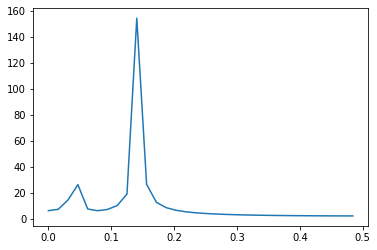

In [42]:

plot(w[0:int(N/2)],abs(Y[0:int(N/2)]))


In [46]:
# рассчитаем периоды для соответствующих частот
per=np.zeros(int(N/2))
per[1:int(N/2)]=1./w[1:int(N/2)]
print (shape(per))
print (per)

(32,)
[ 0.         64.         32.         21.33333333 16.         12.8
 10.66666667  9.14285714  8.          7.11111111  6.4         5.81818182
  5.33333333  4.92307692  4.57142857  4.26666667  4.          3.76470588
  3.55555556  3.36842105  3.2         3.04761905  2.90909091  2.7826087
  2.66666667  2.56        2.46153846  2.37037037  2.28571429  2.20689655
  2.13333333  2.06451613]


Обратите внимание - разбиение по частотам - равномерно, а по периодам - НЕТ!

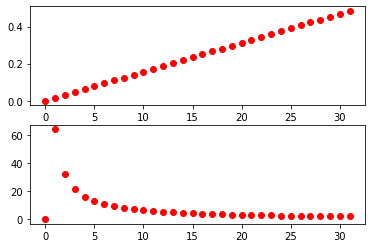

In [49]:
subplot(2,1,1)
plot(w[0:int(N/2)],'ro')
subplot(2,1,2)
plot(per[0:int(N/2)],'ro')

Построим коэффициенты разложения, в зависимости от периода

Text(0.5, 0, 'Период')

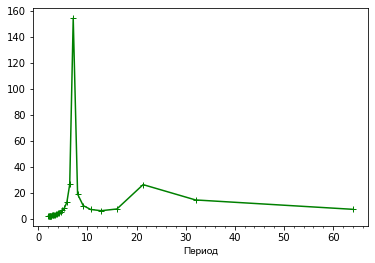

In [51]:
fig, ax = subplots()
xminorLocator=AutoMinorLocator(n=5)
plot(per[1:int(N/2)],abs(Y[1:int(N/2)]),'g-+')
ax.xaxis.set_minor_locator(xminorLocator) # добавляем промежуточные метки на ось х
xlabel(u'Период',{'fontname':'Arial'})


Крестиками нанесены значения к-тов разложения. Видно, что значения периодов не равномерны, и в нашей "сетке" периодов, равных 24 и 7 нет! К-ты максимальны в точках (периодах), ближайшим к ним.

In [ ]:
print (abs(Y[9]),per[9])

In [ ]:
print (abs(Y[3]),per[3])